In [124]:
using Pkg
Pkg.activate(".")

include("src/rainforest_lib.jl")
using .Rainforestlib

  Activating project at `~/workspace/uni/spatial_temporal_data/spatio_temporal_data-rainforest_development`


In [125]:
using Zarr
using YAXArrays

lc = Rainforestlib.get_lcc_datacube()

filtered_dc = Rainforestlib.rough_spatial_filter(lc; time_bounds = (Date(2010), Date(2021)))

small_soy_region_dc = Rainforestlib.rough_spatial_filter(
    lc;
    lon_bounds = (-57, -54),
    lat_bounds = (-10, -6), 
    time_bounds = (Date(2010), Date(2021))
)

YAXArray with the following dimensions
lon                 Axis with 135 Elements from -56.998611111111096 to -54.02083333333332
lat                 Axis with 180 Elements from -6.020833333333328 to -9.998611111111106
time                Axis with 11 Elements from 2010-01-01T00:00:00 to 2020-01-01T00:00:00
name: lccs_class
Total size: 261.04 KB


In [126]:
# set a set of accepted values
rainforest_values = Set(Rainforestlib.LCCSClasses.categories["rainforest"].lccs_classes)

forest_values = Set(Rainforestlib.LCCSClasses.categories["forest"].lccs_classes)

all_forest_values = union(forest_values, rainforest_values)

Set{String} with 13 elements:
  "tree_needleleaved_evergreen_open"
  "tree_needleleaved_deciduous_closed"
  "tree_needleleaved_deciduous_open"
  "tree_needleleaved_deciduous_closed_to_open"
  "tree_broadleaved_deciduous_open"
  "tree_broadleaved_deciduous_closed"
  "tree_broadleaved_evergreen_closed_to_open"
  "tree_cover_flooded_saline_water"
  "tree_needleleaved_evergreen_closed"
  "tree_mixed"
  "tree_broadleaved_deciduous_closed_to_open"
  "tree_cover_flooded_fresh_or_brakish_water"
  "tree_needleleaved_evergreen_closed_to_open"

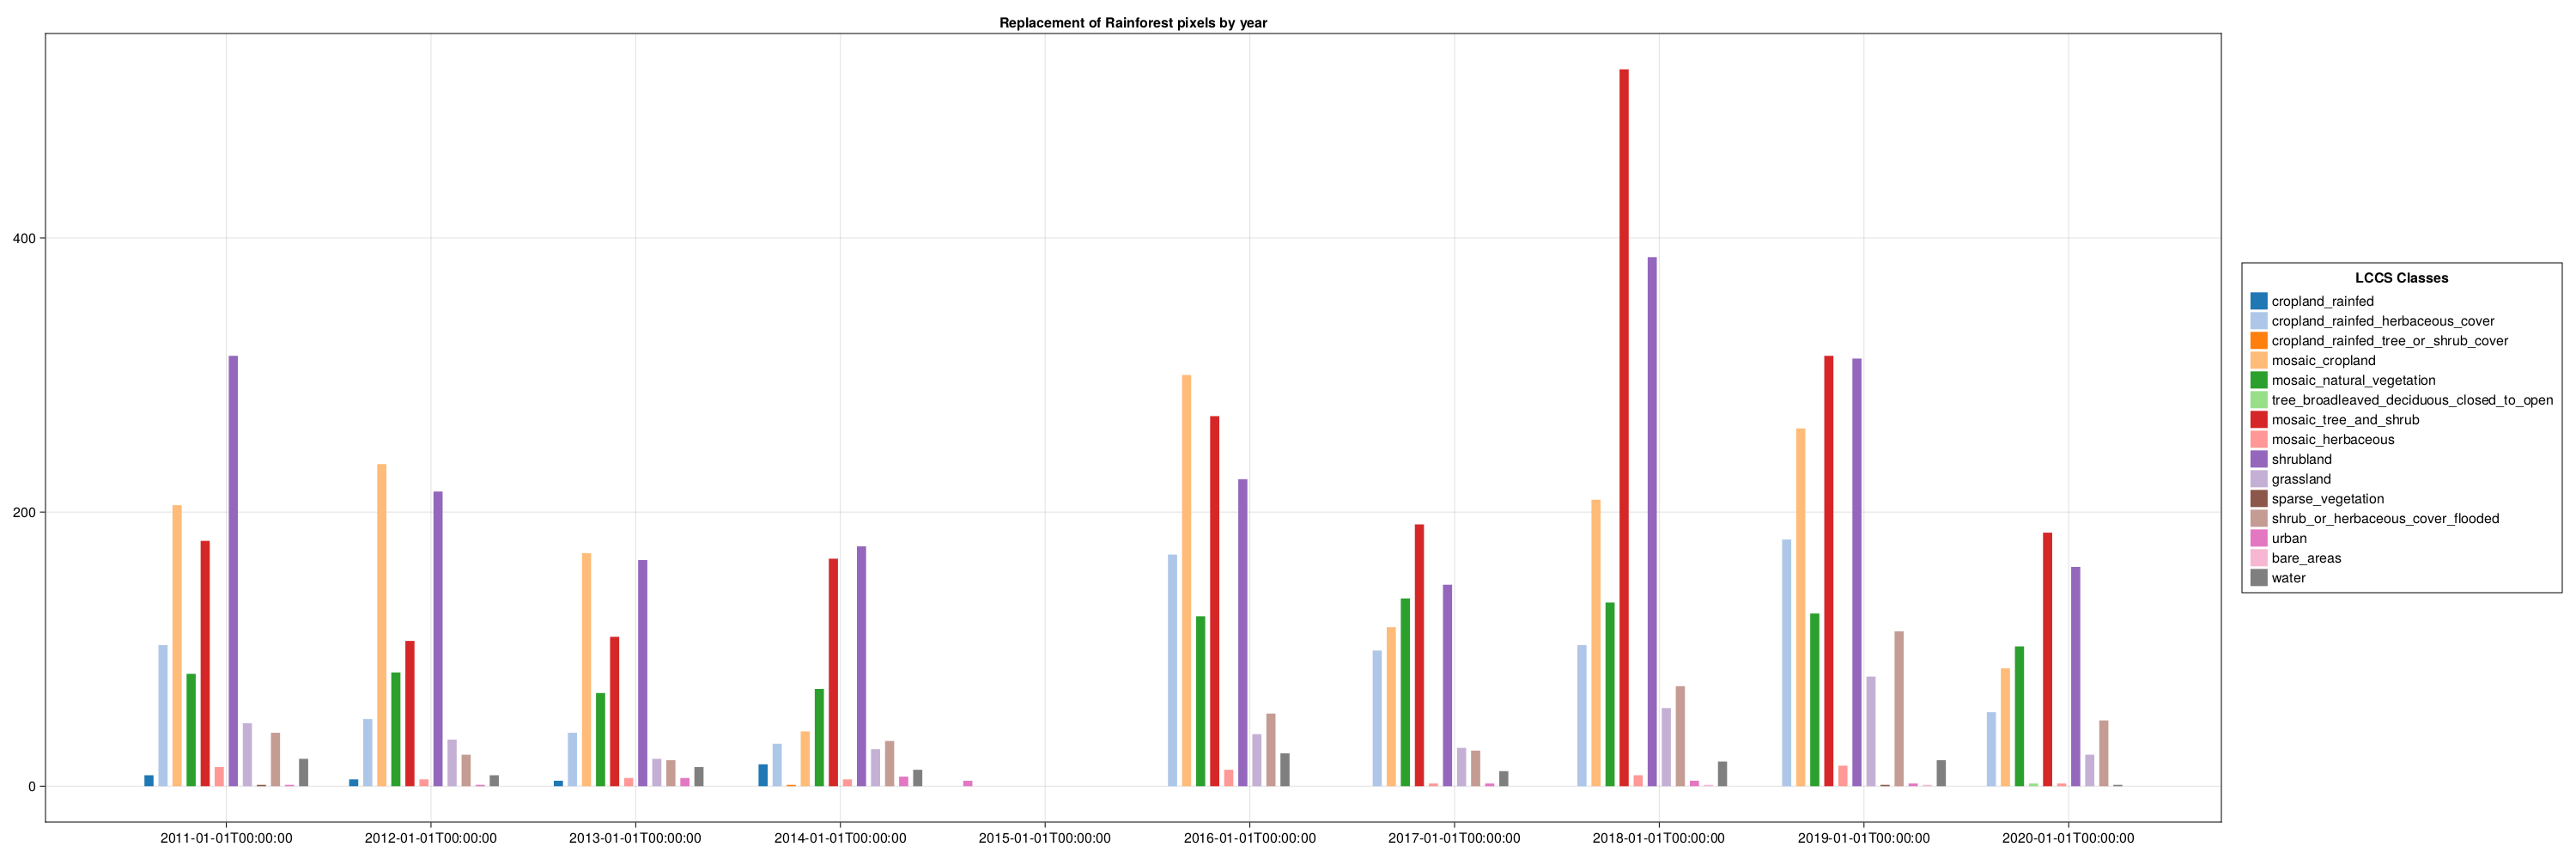

In [127]:
Rainforestlib.build_replacement_figure(filtered_dc, Rainforestlib.LCCSClasses.categories["rainforest"]; resolution = (3000, 1000))

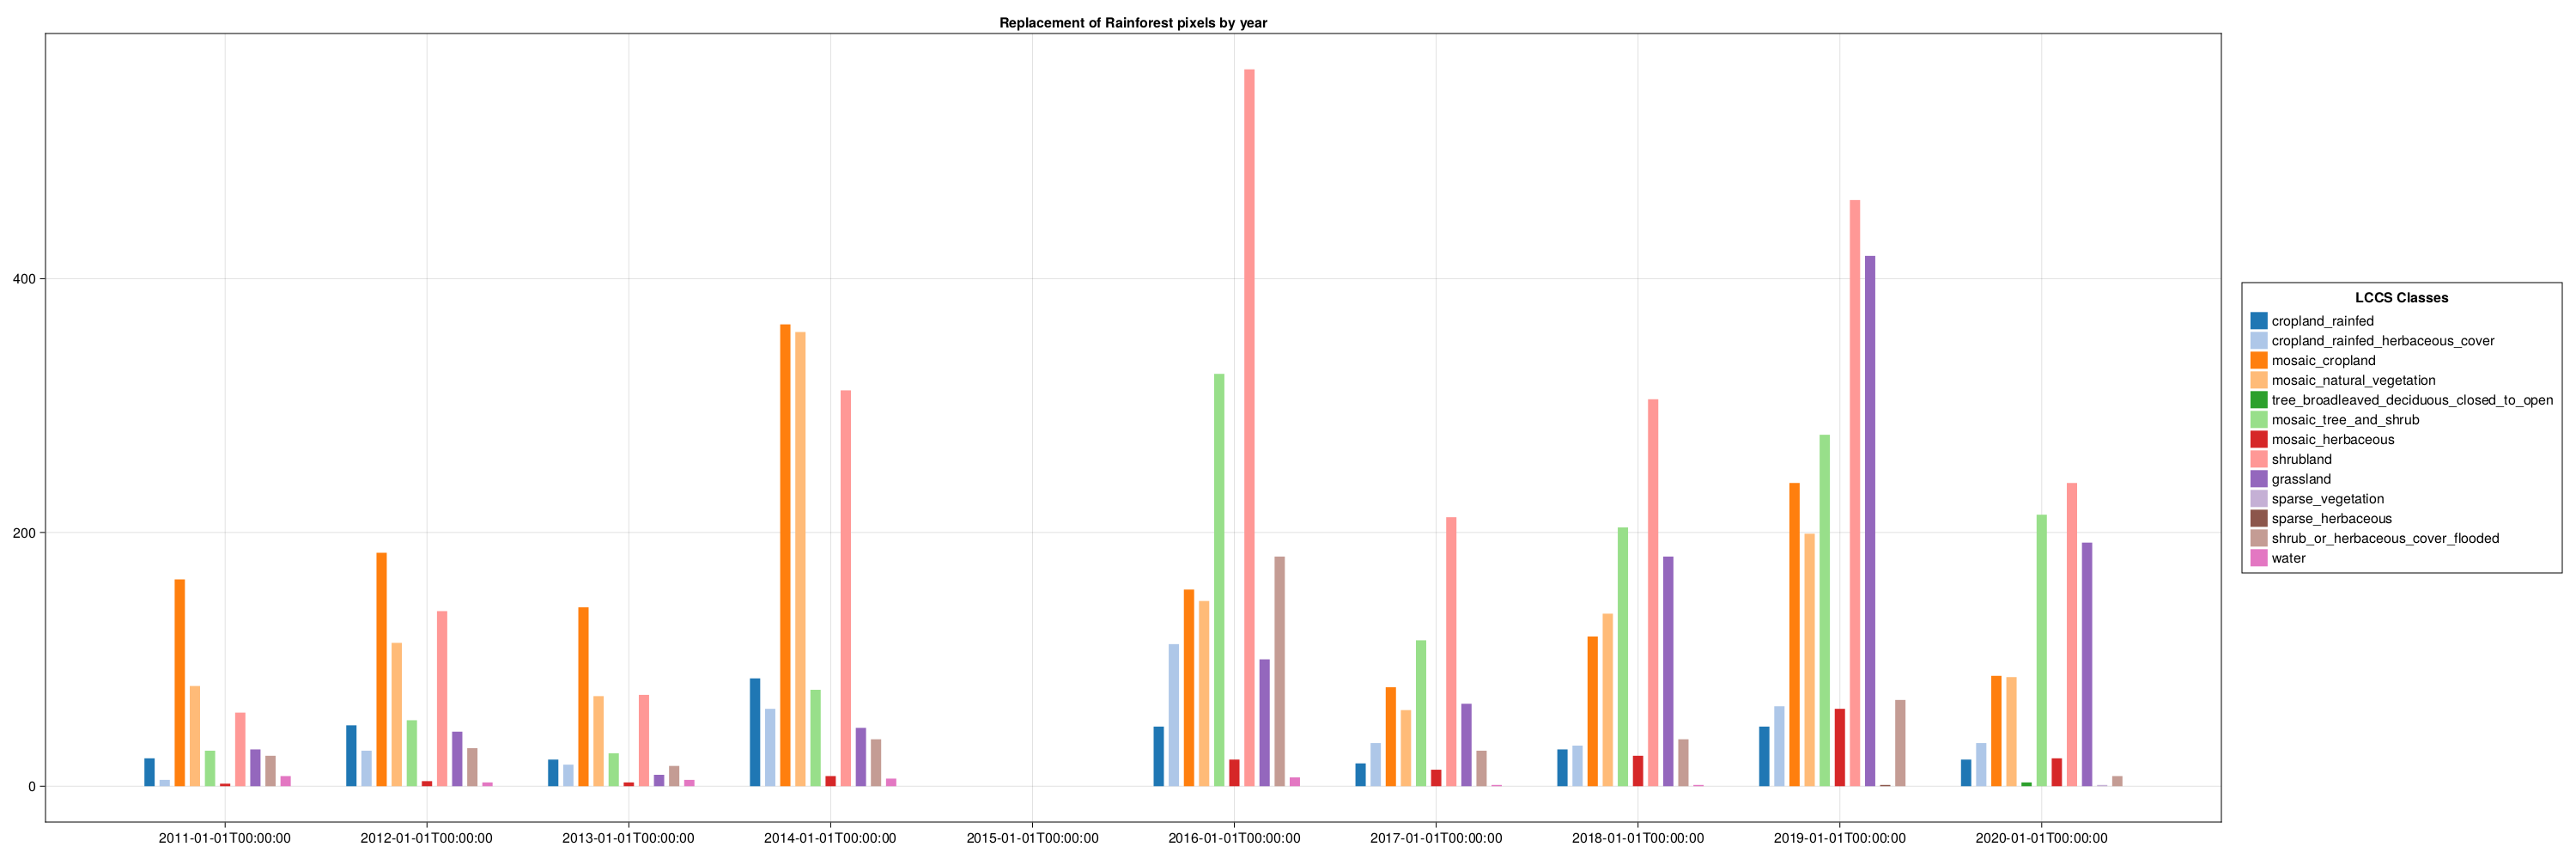

In [128]:
# this is the reverse, so it shows was there BEFORE it was turned into rainforest

Rainforestlib.build_replacement_figure(filtered_dc, Rainforestlib.LCCSClasses.categories["rainforest"]; resolution = (3000, 1000), reverse = true)